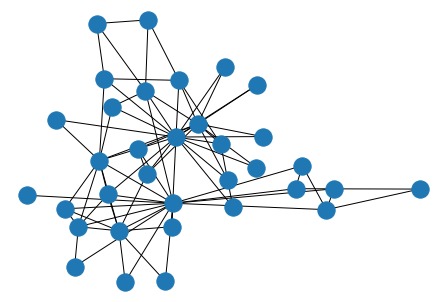

In [1]:
# Create a graph
import networkx as nx
G = nx.karate_club_graph()

# Visualize the graph, for fun
import matplotlib.pyplot as plt
nx.draw(G)

In [2]:
import gurobipy as gp
from gurobipy import GRB

# find a maximum gamma-quasi-clique, with
gamma = 0.75    # requires cluster to have >= 75% of all possible edges

In [3]:
# Create model of Veremyev et al 
#    https://scholar.google.com/scholar?cluster=17275547887851693905&hl=en&as_sdt=0,37
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Create variable for each edge
y = m.addVars( G.edges, vtype=GRB.BINARY )

# Create variable for each possible solution size
MaxSize = 1 + G.number_of_nodes()
z = m.addVars( MaxSize, vtype=GRB.BINARY )

# Objective function: maximize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MAXIMIZE )

# Constraints: if pick edge then must pick incident vertices
m.addConstrs( y[i,j] <= x[i] for i,j in G.edges )
m.addConstrs( y[i,j] <= x[j] for i,j in G.edges )

# Constraint: relate solution size variables z to solution size x(V)
m.addConstr( gp.quicksum( x[i] for i in G.nodes ) == gp.quicksum( k*z[k] for k in range(MaxSize) ) )

# Constraint: pick one solution size
m.addConstr( gp.quicksum( z[k] for k in range(MaxSize) ) == 1 )

# Constraint: get at least gamma fraction of possible edges
import math
m.addConstr( gp.quicksum( y[i,j] for i,j in G.edges ) >= gamma*gp.quicksum( math.comb(k,2)*z[k] for k in range(MaxSize) ) )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 159 rows, 147 columns and 526 nonzeros
Model fingerprint: 0xe078491b
Variable types: 0 continuous, 147 integer (147 binary)
Coefficient statistics:
  Matrix range     [8e-01, 4e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 21 columns
Presolve time: 0.01s
Presolved: 159 rows, 126 columns, 465 nonzeros
Variable types: 0 continuous, 126 integer (126 binary)

Root relaxation: objective 8.000000e+00, 147 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8

In [4]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

print("Selected nodes:", selected_nodes)

Objective: 7.0
Selected nodes: [0, 1, 2, 3, 7, 13, 21]


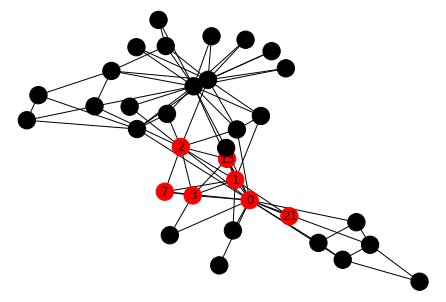

In [5]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, with_labels=True, node_color=node_colors )

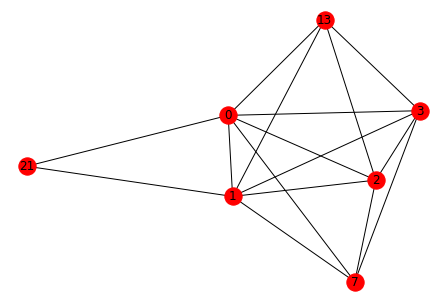

In [6]:
nx.draw( G.subgraph(selected_nodes), with_labels=True, node_color="red")